# Exploring the Titanic dataset

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Loading Dataset

Using the titanic dataset available in the seaborn library

In [2]:
raw_df = sns.load_dataset('titanic')

In [3]:
raw_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
raw_df.shape

(891, 15)

# Data Pre-Processsing and Cleadning

## Missing Values:

In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
nulls = raw_df.isna().any().to_frame()
nulls[nulls[0] == True]

,0
age,True
embarked,True
deck,True
embark_town,True


In [7]:
raw_df['age'].isna().sum(), raw_df['deck'].isna().sum()

(np.int64(177), np.int64(688))

In [8]:
# TODO

Ignoring missing values in `age` for now

## Duplicates

In [9]:
raw_df.duplicated().any()

np.True_

In [10]:
df = raw_df.drop_duplicates()
df.shape

(784, 15)

## Feature Encoding

`alive` already has a numerical column called `survived`

converting `sex` to numerical called `sex_num`

In [11]:
df.loc[:, 'sex_num'] = df.loc[:, 'sex'].map({'male': 1, 'female': 0})
df[['sex_num']].head()

C:\Users\SiNuX\AppData\Local\Temp\ipykernel_4048\4246974632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'sex_num'] = df.loc[:, 'sex'].map({'male': 1, 'female': 0})


,sex_num
0,1
1,0
2,0
3,0
4,1


converting `embarked` to numerical called `embarked_num`

In [12]:
df[['embarked']].value_counts()

embarked
S           568
C           155
Q            59
Name: count, dtype: int64

In [13]:
df.loc[:,'embarked_num'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df[['embarked_num']].head()

C:\Users\SiNuX\AppData\Local\Temp\ipykernel_4048\2707520463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'embarked_num'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})


,embarked_num
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0


Creating `Family_size` column

In [14]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sex_num,embarked_num
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1,0.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0,1.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0,0.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0,0.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1,0.0


In [15]:
fam = df['sibsp'] + df['parch']
df['Family_size'] = fam
df[['Family_size']].head()

C:\Users\SiNuX\AppData\Local\Temp\ipykernel_4048\63669341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Family_size'] = fam


,Family_size
0,1
1,1
2,0
3,1
4,0


# EDA

Central Tendencies

In [16]:
df.describe().round(2)

,survived,pclass,age,sibsp,parch,fare,sex_num,embarked_num,Family_size
count,784.00,784.00,678.00,784.00,784.00,784.00,784.00,782.00,784.00
mean,0.41,2.24,29.87,0.52,0.42,34.71,0.63,0.35,0.94
std,0.49,0.86,14.76,0.99,0.84,52.16,0.48,0.62,1.52
min,0.00,1.00,0.42,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,1.00,20.00,0.00,0.00,8.05,0.00,0.00,0.00
50%,0.00,3.00,28.25,0.00,0.00,15.90,1.00,0.00,0.00
75%,1.00,3.00,39.00,1.00,1.00,34.11,1.00,1.00,1.00
max,1.00,3.00,80.00,8.00,6.00,512.33,1.00,2.00,10.00


In [17]:
mean_age = df["age"].mean().__round__(2)
mean_age

np.float64(29.87)

## Feature Distributions

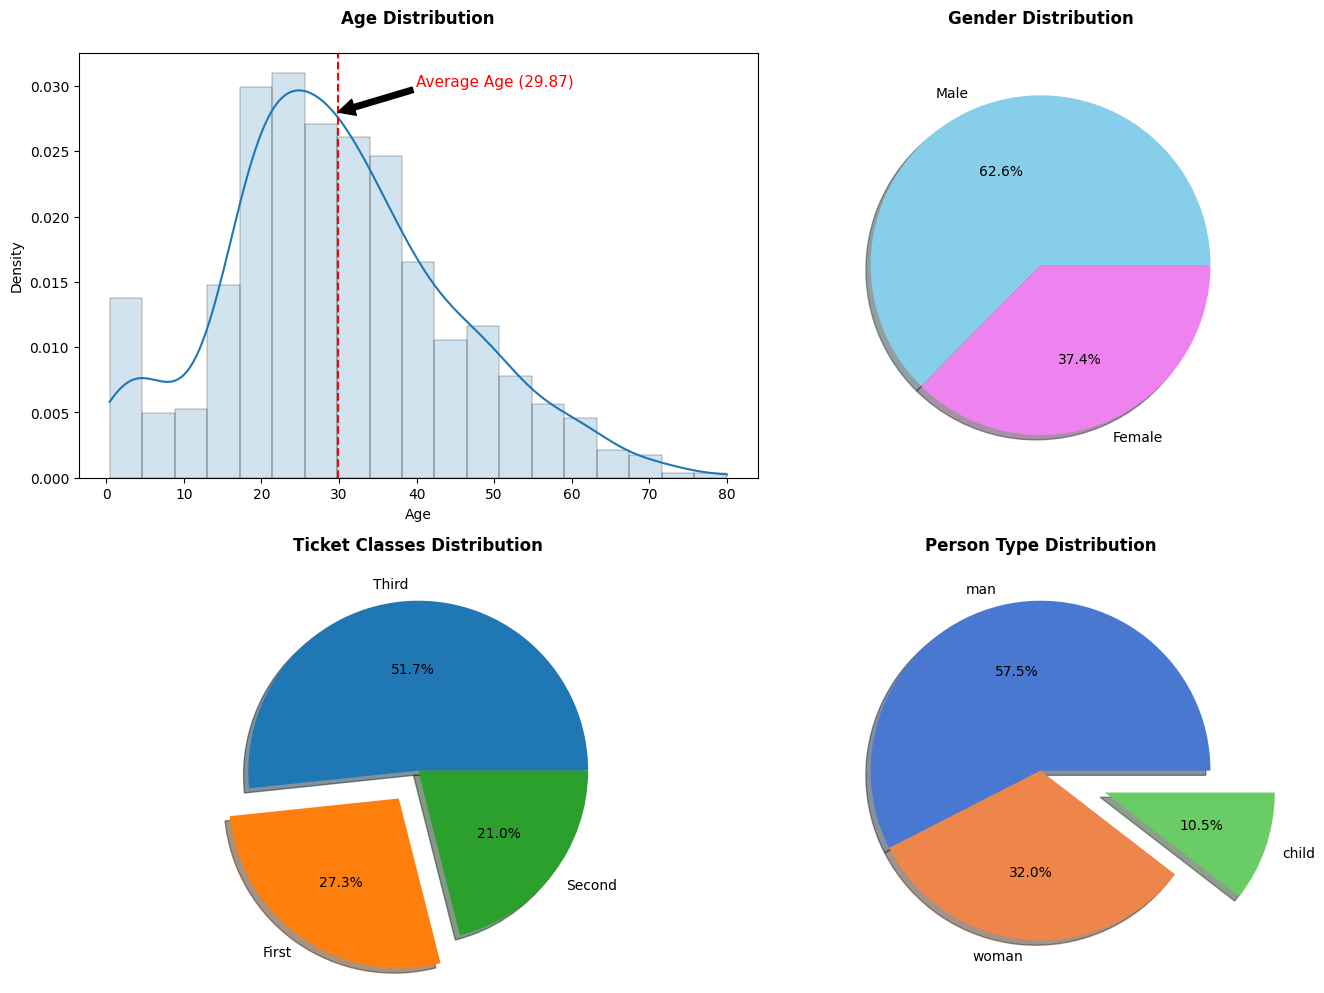

In [18]:
plt.figure(figsize=(14, 10))

# Seaborn histogram for age
plt.subplot(2, 2, 1)
sns.histplot(df['age'], kde=True, alpha=0.2, linewidth=0.2, stat="density")
plt.axvline(x=mean_age, color='r', linestyle='--', label='Mean')    # Vertical Line for the average

plt.annotate(                                                       # Annotate the average
    f"Average Age ({mean_age})",
    xy=(mean_age, 0.028),
    xytext=(mean_age + 10, 0.03),
    arrowprops=dict(facecolor='black'),
    fontsize=11,
    color='red'
)

plt.title("Age Distribution", weight='bold', y=1.05)
plt.xlabel("Age")
plt.ylabel("Density")


# Gender Pie plot
plt.subplot(2, 2, 2)
plt.pie(
    df["sex"].value_counts(),
    labels=["Male", "Female"],
    autopct=lambda x: f"{x:.1f}%",
    shadow=True,
    colors=["skyblue", "violet"],
)
plt.title("Gender Distribution", weight="bold", y=1.05)


# Ticket class Pie plot
plt.subplot(2, 2, 3)
plt.pie(
    df["class"].value_counts(),
    labels=df["class"].value_counts().index,
    autopct=lambda x: f"{x:.1f}%",
    shadow=True,
    explode=[0, 0.2, 0]
)
plt.title("Ticket Classes Distribution", weight="bold")


# Person Type Pie plot
plt.subplot(2, 2, 4)
plt.pie(
    df["who"].value_counts(),
    labels=df["who"].value_counts().index,
    autopct=lambda x: f"{x:.1f}%",
    shadow=True,
    explode=[0, 0, 0.4],
    colors=sns.color_palette("muted")
)
plt.title("Person Type Distribution", weight="bold")

# Adjust layout
plt.tight_layout()
plt.show()

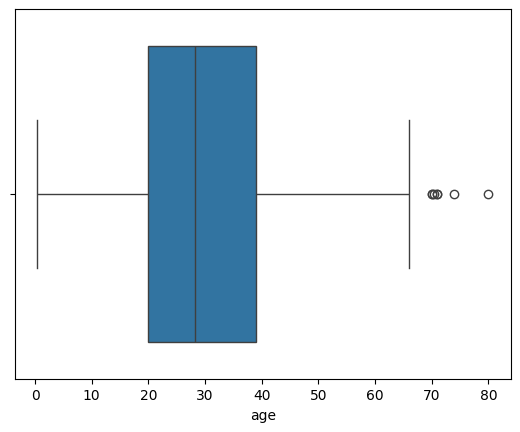

In [19]:
sns.boxplot(x=df['age'])
plt.show()

`embark_town` Distribution

Text(0.5, 1.05, 'Embarkment Distribution')

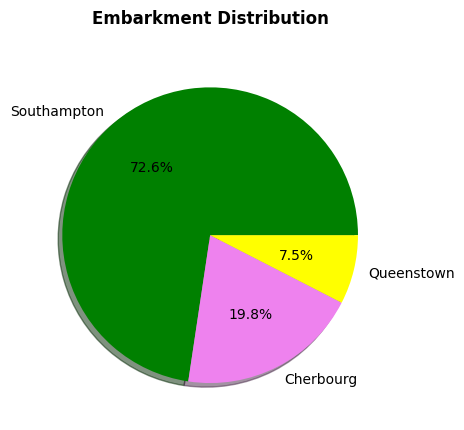

In [20]:
plt.pie(
    df['embark_town'].value_counts(),
    labels=df['embark_town'].value_counts().index,
    autopct=lambda x: f"{x:.1f}%",
    shadow=True,
    colors=["green", "violet", "yellow"],
)
plt.title("Embarkment Distribution", weight="bold", y=1.05)

## Correlations

### Pair Plots

In [21]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sex_num,embarked_num,Family_size
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1,0.0,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0,1.0,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0,0.0,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0,0.0,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1,0.0,0


<Figure size 1200x800 with 0 Axes>

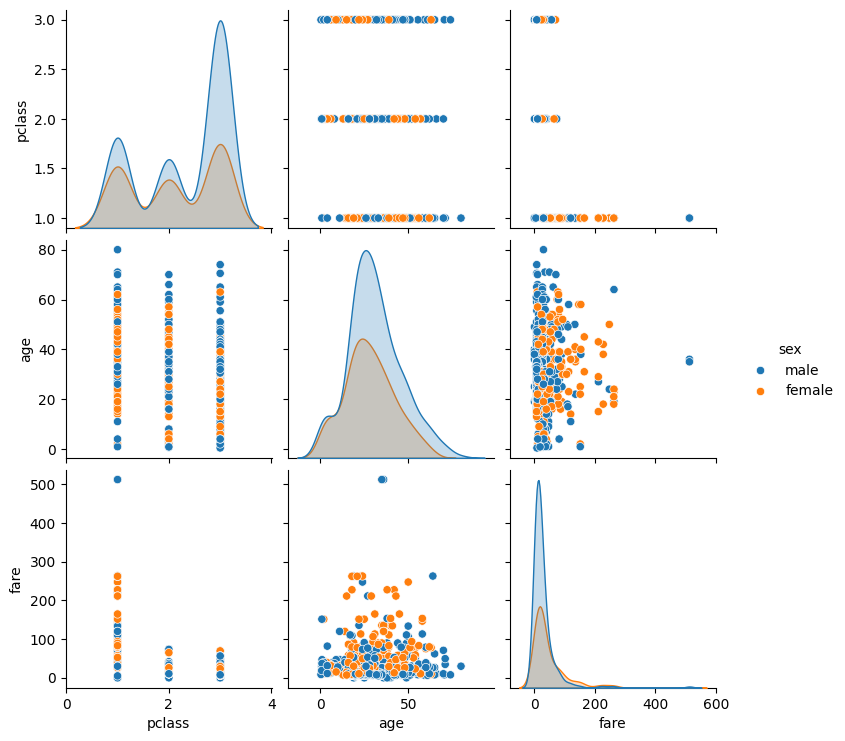

In [22]:
plt.figure(figsize=(12, 8))

pair_plot_temp = df[["pclass", "sex", "age", "fare"]]
sns.pairplot(pair_plot_temp, kind='scatter', hue="sex")
plt.show()

### Survival Rates

Relationship of `Age` with `survival`

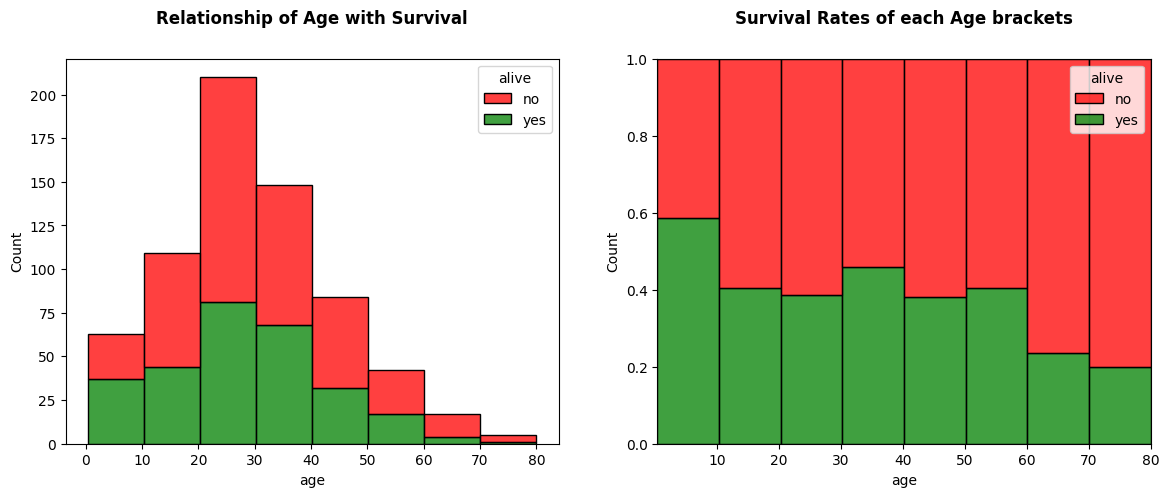

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(
    data=df,
    x="age",
    binwidth=10,
    hue="alive",
    multiple="stack",
    palette=["red", "green"],
    ax=ax[0]
)
ax[0].set_title("Relationship of Age with Survival", weight="bold", y=1.07)

sns.histplot(
    data=df,
    x="age",
    binwidth=10,
    hue="alive",
    multiple="fill",
    palette=["red", "green"],
    ax=ax[1]
)
ax[1].set_title("Survival Rates of each Age brackets", weight="bold", y=1.07)


plt.show()

Relationship of `Class` with `survival`

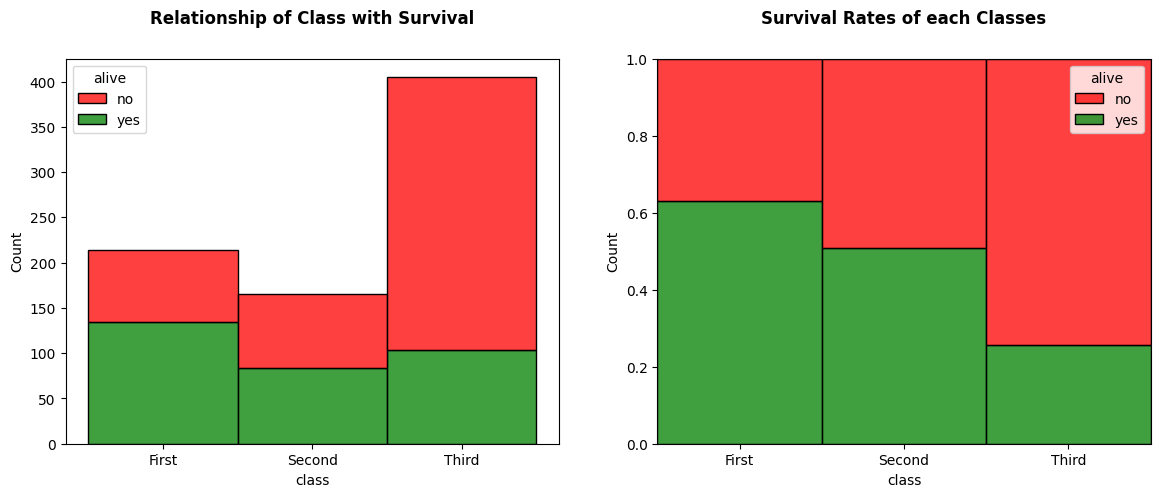

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(
    data=df,
    x='class',
    hue="alive",
    multiple='stack',
    palette=['red', 'green'],
    ax=ax[0]
)
ax[0].set_title("Relationship of Class with Survival", weight="bold", y=1.07)

sns.histplot(
    data=df,
    x='class',
    hue="alive",
    multiple='fill',
    palette=['red', 'green'],
    ax=ax[1]
)
ax[1].set_title("Survival Rates of each Classes", weight="bold", y=1.07)


plt.show()

Relation of `gender` with `survival`

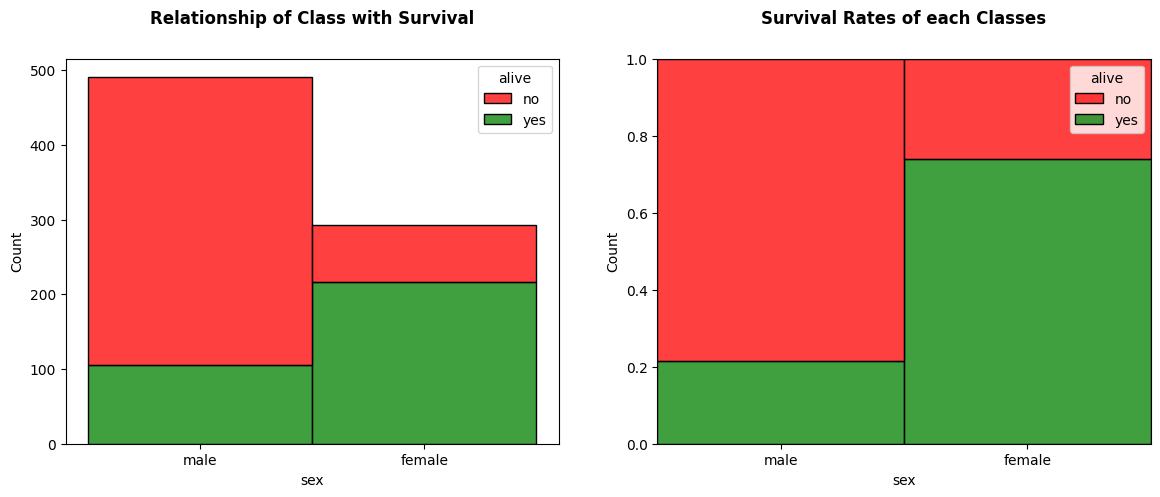

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(
    data=df,
    x='sex',
    hue="alive",
    multiple='stack',
    palette=['red', 'green'],
    ax=ax[0]
)
ax[0].set_title("Relationship of Class with Survival", weight="bold", y=1.07)

sns.histplot(
    data=df,
    x='sex',
    hue="alive",
    multiple='fill',
    palette=['red', 'green'],
    ax=ax[1]
)
ax[1].set_title("Survival Rates of each Classes", weight="bold", y=1.07)


plt.show()

Relation of `Family_size` with `survival`

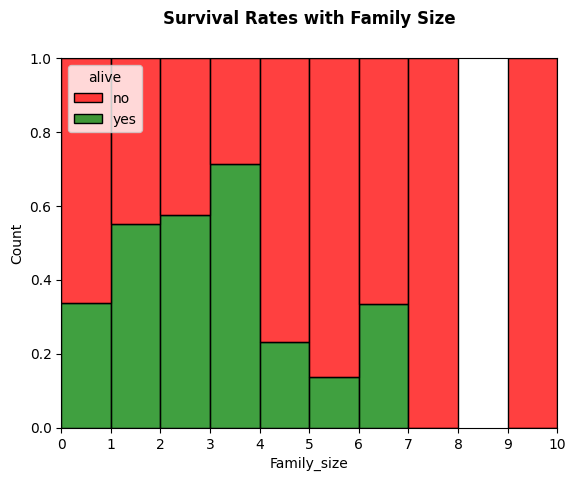

In [26]:
sns.histplot(
    data=df,
    x='Family_size',
    hue="alive",
    multiple='fill',
    palette=['red', 'green'],
    binwidth=1
)
plt.title("Survival Rates with Family Size", weight="bold", y=1.07)
plt.xticks(range(0, 11))
plt.show()

# Inferences

`Children` who boarded with adults or came alone

In [27]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sex_num,embarked_num,Family_size
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1,0.0,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0,1.0,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0,0.0,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0,0.0,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1,0.0,0


In [28]:
children = df[df['who'] == 'child']
children[['alone']].value_counts()

alone
False    76
True      6
Name: count, dtype: int64

`Children` who came alone and survived

In [29]:
children[(children['alone'] == True) & (children['alive'] == 'yes')]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sex_num,embarked_num,Family_size
22,1,3,female,15.0,0,0,8.0292,Q,Third,child,False,NaN,Queenstown,yes,True,0,2.0,0
777,1,3,female,5.0,0,0,12.4750,S,Third,child,False,NaN,Southampton,yes,True,0,0.0,0
780,1,3,female,13.0,0,0,7.2292,C,Third,child,False,NaN,Cherbourg,yes,True,0,1.0,0
875,1,3,female,15.0,0,0,7.2250,C,Third,child,False,NaN,Cherbourg,yes,True,0,1.0,0


# Conclusion

- **Age**:
    
    In a general sense, younger the person higher the survival rate

- **Gender**:
    
    Female gender has higher survival rate

- **Person Type**:
    
    In a general sense, women have higher survival rate, follwed by childern

- **Ticket Classes**:
    
    First class passengers seems to have higher survival rate

- **Family size**:

    People with 1-3 family size *(Lower size)* tend to have higher survival rate